In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
df=pd.read_csv(r'C:\Users\abc\dataset\weatherHistory.csv')

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 7.4+ MB


In [6]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df.set_index('Formatted Date', inplace= True)

In [7]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:


df1 = df[['Apparent Temperature (C)', 'Humidity']] 
df2 = df1.resample('M').mean()



In [9]:
df2.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


<AxesSubplot:title={'center':'Variation in Apparent Temperature and Humidity with time'}, xlabel='Formatted Date'>

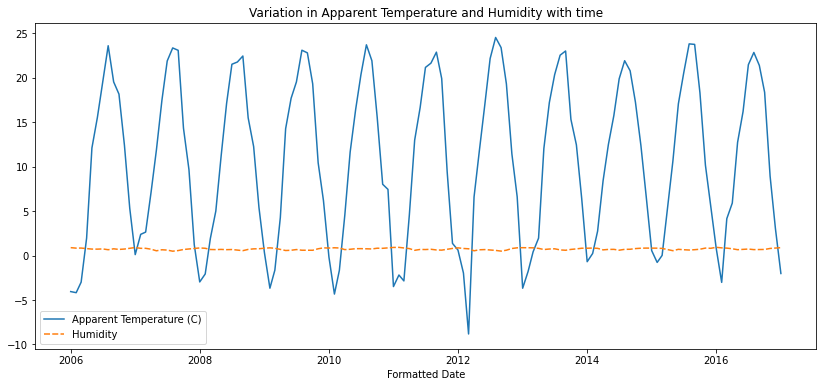

In [10]:


import seaborn as sns

import warnings

warnings.filterwarnings ("ignore") 
plt.figure (figsize=(14,6))

plt.title ("Variation in Apparent Temperature and Humidity with time")
sns. lineplot (data=df2)



In [11]:
df3 = df2[df2.index.month==4] 
print (df3) 
df3.dtypes

                           Apparent Temperature (C)  Humidity
Formatted Date                                               
2006-04-30 00:00:00+00:00                 12.098827  0.728625
2007-04-30 00:00:00+00:00                 11.894421  0.536361
2008-04-30 00:00:00+00:00                 11.183688  0.693194
2009-04-30 00:00:00+00:00                 14.267076  0.567847
2010-04-30 00:00:00+00:00                 11.639406  0.706875
2011-04-30 00:00:00+00:00                 12.978997  0.591625
2012-04-30 00:00:00+00:00                 11.782770  0.650222
2013-04-30 00:00:00+00:00                 12.045563  0.677667
2014-04-30 00:00:00+00:00                 12.486181  0.691403
2015-04-30 00:00:00+00:00                 10.632801  0.547764
2016-04-30 00:00:00+00:00                 12.731427  0.659972


Apparent Temperature (C)    float64
Humidity                    float64
dtype: object

ConversionError: Failed to convert value(s) to axis units: ['04-01-2006', '04-01-2007', '04-01-2008', '04-01-2009', '04-01-2010', '04-01-2011', '04-01-2012', '04-01-2013', '04-01-2014', '04-01-2015', '04-01-2016']

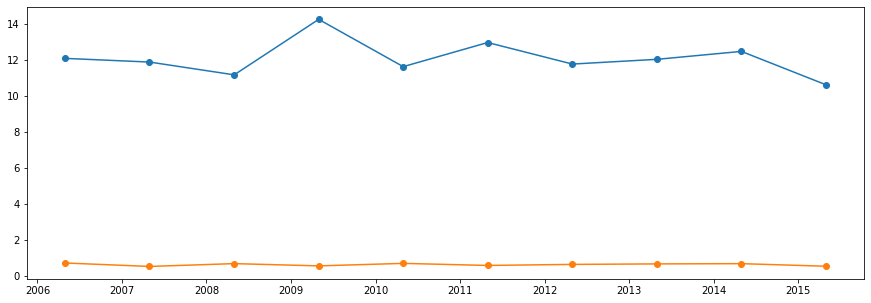

In [12]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,5)) 
ax.plot(df3.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-', 
        label='Apparent Temperature (C)') 
ax.plot(df3.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-', label='Humidity')

ax.set_xticks(['04-01-2006', '04-01-2007', '04-01-2008', '04-01-2009', '04-01-2010','04-01-2011', '04-01-2012',
               '04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
ax.xaxis.set_major_formatter (mdates.DateFormatter('%d %m %y'))                     
ax.legend(loc='center right')
ax.set_xlabel('Month of April')